### 1. **What is a Decision Tree, and how does it work?**

* A Decision Tree is a **supervised machine learning algorithm** used for **classification and regression**.
* It splits the data into subsets based on feature values.
* The tree is made of **nodes**:

  * **Root Node**: Represents the entire dataset.
  * **Internal Nodes**: Represent feature-based decisions.
  * **Leaf Nodes**: Represent the output label or value.
* It works by:

  1. Finding the **best feature** to split the data.
  2. Recursively splitting data into smaller subsets.
  3. Stopping when nodes are pure or meet stopping criteria.

---

### 2. **What are impurity measures in Decision Trees?**

* Impurity measures quantify how **mixed** the data is at a node.
* Common impurity measures:

  * **Gini Impurity**
  * **Entropy**
* Used to select the best feature for splitting.

---

### 3. **What is the mathematical formula for Gini Impurity?**

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

* Where $p_i$ is the probability of class $i$ in the node.
* Lower Gini indicates purer nodes.

---

### 4. **What is the mathematical formula for Entropy?**

$$
Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$

* Where $p_i$ is the probability of class $i$.
* Entropy is 0 when the node is pure (only one class).

---

### 5. **What is Information Gain, and how is it used in Decision Trees?**

* **Information Gain (IG)** is the reduction in entropy after a dataset is split on an attribute.

$$
IG = Entropy_{parent} - \sum_{i=1}^{k} \frac{n_i}{n} \cdot Entropy_{child_i}
$$

* Used to choose the best feature for splitting at each step.

---

### 6. **What is the difference between Gini Impurity and Entropy?**

| Aspect      | Gini Impurity                  | Entropy                      |
| ----------- | ------------------------------ | ---------------------------- |
| Formula     | $1 - \sum p_i^2$               | $-\sum p_i \log_2 p_i$       |
| Computation | Faster                         | Slower (uses log)            |
| Value Range | 0 (pure) to 0.5 (binary split) | 0 (pure) to 1 (binary split) |
| Preference  | CART uses Gini                 | ID3 uses Entropy             |

---

### 7. **What is the mathematical explanation behind Decision Trees?**

* A Decision Tree:

  1. Starts with a dataset $D$.
  2. Chooses a feature $A$ that gives the highest **Information Gain** or lowest **Gini Impurity** after split.
  3. Repeats recursively on subsets $D_1, D_2, ..., D_n$ until:

     * Node is pure.
     * Max depth is reached.
     * Information gain is negligible.

---

### 8. **What is Pre-Pruning in Decision Trees?**

* Also called **early stopping**.
* Stop tree growth **before** it becomes too complex.
* Criteria:

  * Max depth
  * Min samples per node
  * Min information gain

---

### 9. **What is Post-Pruning in Decision Trees?**

* Also called **pruning after growth**.
* Build full tree, then **remove branches** that don’t improve accuracy (based on validation set).
* Methods:

  * Cost-complexity pruning (CART)
  * Reduced error pruning

---

### 10. **Difference between Pre-Pruning and Post-Pruning**

| Feature      | Pre-Pruning                                 | Post-Pruning                   |
| ------------ | ------------------------------------------- | ------------------------------ |
| When applied | During tree building                        | After tree is fully built      |
| Advantage    | Faster training, prevents overfitting early | More informed pruning          |
| Disadvantage | May miss important patterns                 | More computationally expensive |

---

### 11. **What is a Decision Tree Regressor?**

* A version of the Decision Tree used for **predicting continuous values**.
* Splits data to **minimize variance** (instead of impurity).
* At each leaf, predicts the **mean** of the target variable in that subset.

---

### 12. **Advantages and Disadvantages of Decision Trees**

**Advantages:**

* Easy to understand and interpret
* No need for feature scaling
* Handles both numerical and categorical data
* Works well with small datasets

**Disadvantages:**

* Prone to overfitting
* Unstable to slight data changes
* Greedy algorithm may miss optimal tree
* Biased towards features with more levels

---

### 13. **How does a Decision Tree handle missing values?**

* Strategies include:

  * **Surrogate splits**: Use other features that give similar splits.
  * **Imputation**: Fill missing values with mean/median/mode.
  * **Missing branch**: Add a branch for missing values during training.

---

### 14. **How does a Decision Tree handle categorical features?**

* Can directly split on categorical values.
* For multi-category features:

  * Use **one-vs-rest** or **best subset split** based on impurity reduction.

---

### 15. **Real-world Applications of Decision Trees**

* **Banking**: Loan approval, credit scoring
* **Healthcare**: Disease diagnosis
* **Retail**: Customer segmentation
* **Finance**: Fraud detection
* **Manufacturing**: Predictive maintenance
* **Marketing**: Targeted advertising




In [3]:
# 16. Train a Decision Tree Classifier on the Iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
# 17. Using Gini Impurity and printing feature importances
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)
print("Feature importances (Gini):", clf_gini.feature_importances_)

NameError: name 'X_train' is not defined

In [6]:
# 18. Using Entropy and printing accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

Accuracy (Entropy): 0.9777777777777777


In [9]:
# 19. Decision Tree Regressor on housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(X_train_h, y_train_h)
y_pred_h = reg.predict(X_test_h)
print("MSE:", mean_squared_error(y_test_h, y_pred_h))

MSE: 0.5285100131694768


In [11]:
# 20. Visualize the tree using graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")

'iris_tree.pdf'

In [13]:
# 21. Max depth 3 vs full tree
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
y_pred3 = clf_depth3.predict(X_test)
print("Accuracy (Depth=3):", accuracy_score(y_test, y_pred3))

Accuracy (Depth=3): 1.0


In [14]:
# 22. Using min_samples_split=5
clf_min_samples = DecisionTreeClassifier(min_samples_split=5)
clf_min_samples.fit(X_train, y_train)
y_pred_min = clf_min_samples.predict(X_test)
print("Accuracy (min_samples_split=5):", accuracy_score(y_test, y_pred_min))


Accuracy (min_samples_split=5): 1.0


In [18]:
# 23. With and without feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, iris.target, test_size=0.3, random_state=42)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = clf_scaled.predict(X_test_s)
print("Accuracy (Scaled):", accuracy_score(y_test_s, y_pred_scaled))

print("Accuracy (Unscaled):", accuracy_score(y_test, y_pred))


Accuracy (Scaled): 1.0
Accuracy (Unscaled): 1.0


In [20]:
# 24. One-vs-Rest (OvR) strategy
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
print("Accuracy (OvR):", accuracy_score(y_test, y_pred_ovr))

Accuracy (OvR): 1.0


In [22]:
# 25. Display feature importance scores
print("Feature importances:", clf.feature_importances_)

Feature importances: [0.03822004 0.         0.06846677 0.89331319]


In [25]:
# 26. Regressor with max_depth=5 vs full tree
reg5 = DecisionTreeRegressor(max_depth=5)
reg5.fit(X_train_h, y_train_h)
y_pred5 = reg5.predict(X_test_h)
print("MSE (max_depth=5):", mean_squared_error(y_test_h, y_pred5))
print("MSE (unrestricted):", mean_squared_error(y_test_h, y_pred_h))

MSE (max_depth=5): 0.5210801561811792
MSE (unrestricted): 0.5285100131694768


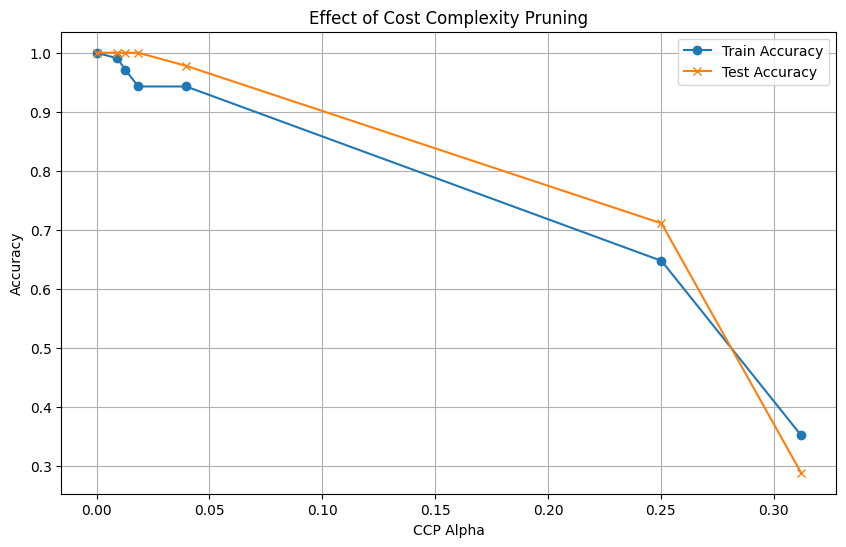

In [27]:
# 27. Cost Complexity Pruning (CCP)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

train_scores = [clf_temp.score(X_train, y_train) for clf_temp in clfs]
test_scores = [clf_temp.score(X_test, y_test) for clf_temp in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='x', label='Test Accuracy')
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of Cost Complexity Pruning")
plt.grid(True)
plt.show()

In [29]:
# 28. Evaluate performance using precision, recall, and F1-score
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


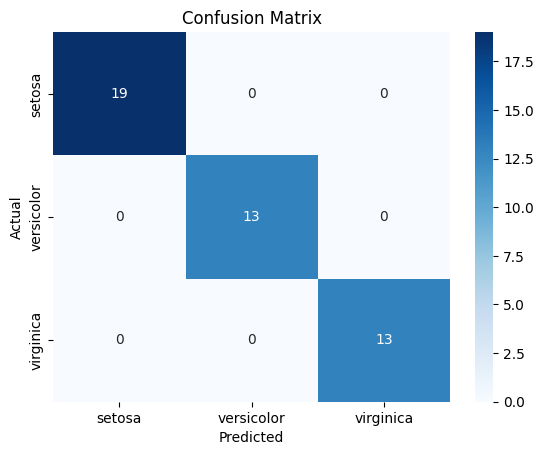

In [31]:
# 29. Visualize confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# 30. GridSearchCV for max_depth and min_samples_split
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Best Score: 0.9428571428571428
